In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Read in data
#df = pd.read_csv("us-counties.csv")
df = pd.read_pickle("Data_pkl/covid19/usafacts_covid_df.pkl")

In [3]:
#Check data
df.head()

,countyFIPS,o_County Name,o_State,stateFIPS,date,o_cases,deaths,population
0,0,Statewide Unallocated,AL,1,2020-01-22,0,0,0
1,1001,Autauga County,AL,1,2020-01-22,0,0,55869
2,1003,Baldwin County,AL,1,2020-01-22,0,0,223234
3,1005,Barbour County,AL,1,2020-01-22,0,0,24686
4,1007,Bibb County,AL,1,2020-01-22,0,0,22394


In [4]:
df.dtypes

countyFIPS             category
o_County Name            object
o_State                  object
stateFIPS              category
date             datetime64[ns]
o_cases                   int64
deaths                    Int64
population                Int64
dtype: object

In [5]:
#Convert fips from float to int
#df['fips'] = df['fips'].astype(int)

#Check that it worked
#df.dtypes

In [6]:
#Earliest date in data
min_date = df["date"].min()
min_date

Timestamp('2020-01-22 00:00:00')

In [7]:
#Latest date in data
max_date = df["date"].max()
max_date

Timestamp('2020-04-25 00:00:00')

## Cumulative Total Cases by Day

In [8]:
#Create a dataframe that has the total number of cases in the country by day
total_by_date = df.groupby(["date"], as_index=False)["o_cases"].sum()

In [9]:
total_by_date.head()

,date,o_cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5


Text(0, 0.5, 'Cases')

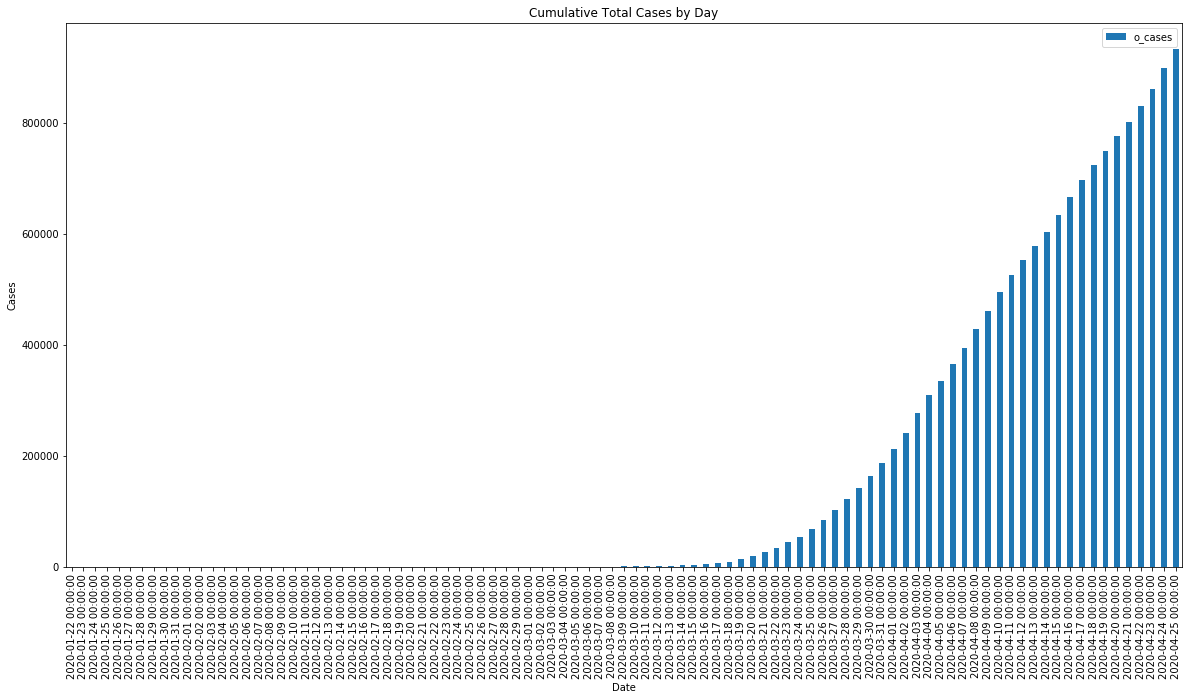

In [10]:
ax = total_by_date.plot(kind='bar', figsize = (20,10), x='date',y='o_cases', title = "Cumulative Total Cases by Day")
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

## Cumulative Total Deaths by Day

In [11]:
deaths_by_date = df.groupby("date")["deaths"].sum()

In [12]:
deaths_by_date.head()

date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: deaths, dtype: Int64

Text(0, 0.5, 'Cases')

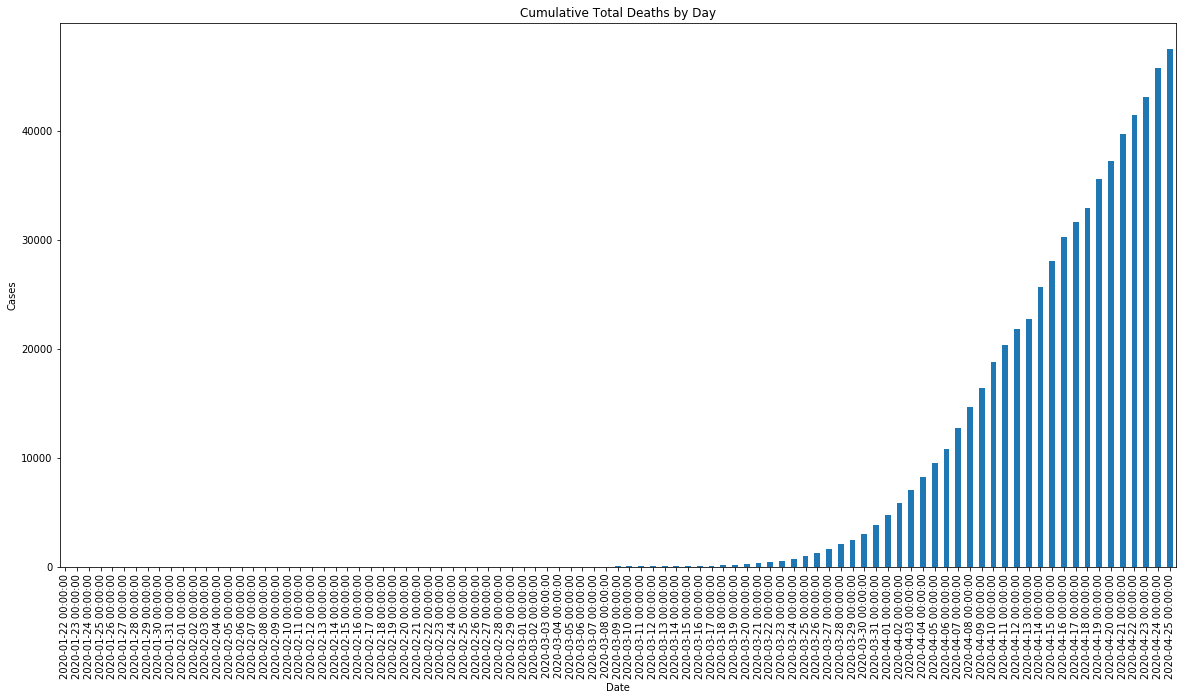

In [13]:
ax = deaths_by_date.plot(kind='bar', figsize = (20,10), x='date',y='cases', title = "Cumulative Total Deaths by Day")
ax.set_xlabel("Date")
ax.set_ylabel("Cases")


## Total Number of New Cases per Day

In [14]:
total_by_date['new_cases'] = total_by_date['o_cases'] - total_by_date['o_cases'].shift(1)

Text(0, 0.5, 'Cases')

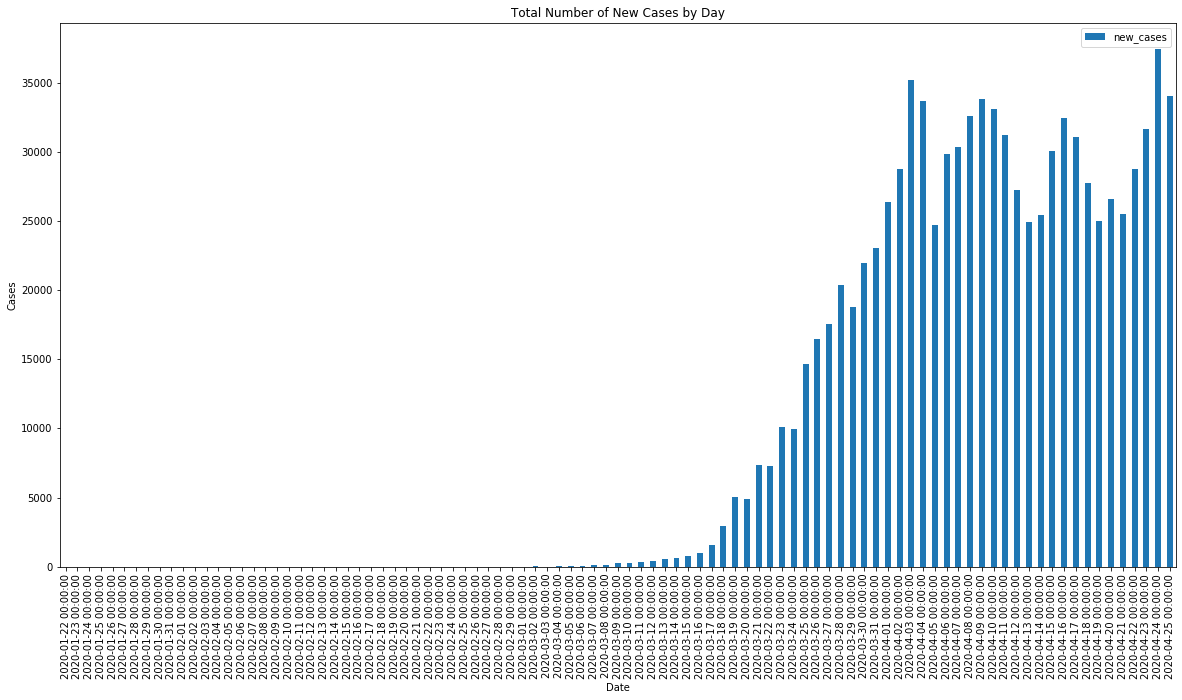

In [15]:
ax = total_by_date.plot(kind='bar', figsize = (20,10), x='date',y='new_cases', title = "Total Number of New Cases by Day")
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

## Number of New Cases per Day by State

In [16]:
#Number of new cases per day by state

#Isolate the state -- INPUT STATE NAME HERE
state_name = "CO"

state_df = df[df['o_State'] == state_name]
state_df.head()

,countyFIPS,o_County Name,o_State,stateFIPS,date,o_cases,deaths,population
251,0,Statewide Unallocated,CO,8,2020-01-22,0,0,0
252,8001,Adams County,CO,8,2020-01-22,0,0,517421
253,8003,Alamosa County,CO,8,2020-01-22,0,0,16233
254,8005,Arapahoe County,CO,8,2020-01-22,0,0,656590
255,8007,Archuleta County,CO,8,2020-01-22,0,0,14029


In [17]:
#Dataframe for total by day by state
date_and_state = state_df.groupby(["date"], as_index=False)["o_cases"].sum()
date_and_state.head()

,date,o_cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [18]:
#Add a column to the dataframe that is the number of new cases per day
date_and_state['new_cases'] = date_and_state['o_cases'] - date_and_state['o_cases'].shift(1)
date_and_state.head()

,date,o_cases,new_cases
0,2020-01-22,0,NaN
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0


Text(0, 0.5, 'Cases')

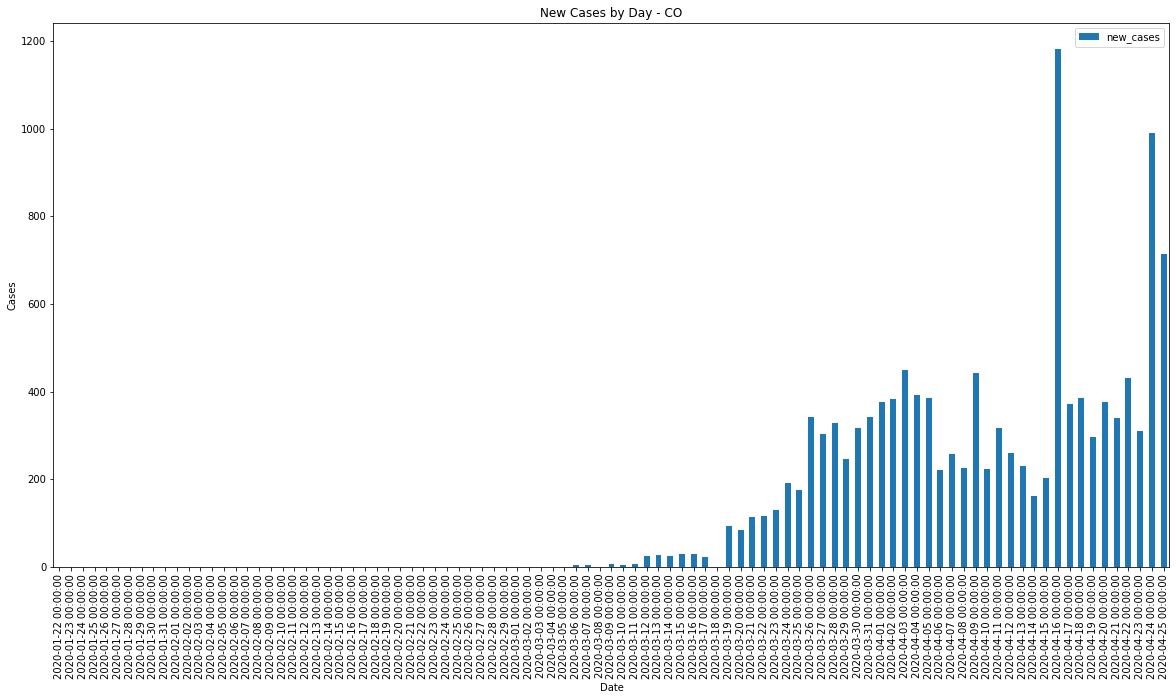

In [19]:
#date_and_state.head()
ax = date_and_state.plot(kind='bar', figsize = (20,10), x='date',y='new_cases', title = "New Cases by Day - " + state_name)
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

## Number of New Cases per Day by County

In [20]:
df.head()

,countyFIPS,o_County Name,o_State,stateFIPS,date,o_cases,deaths,population
0,0,Statewide Unallocated,AL,1,2020-01-22,0,0,0
1,1001,Autauga County,AL,1,2020-01-22,0,0,55869
2,1003,Baldwin County,AL,1,2020-01-22,0,0,223234
3,1005,Barbour County,AL,1,2020-01-22,0,0,24686
4,1007,Bibb County,AL,1,2020-01-22,0,0,22394


In [21]:
#Number of new cases per day by state

#Isolate the county -- INPUT COUNTY FIPS CODE NAME HERE
#Jefferson = 8059
#Denver = 8031
#Cobb = 13067

fips_code = 8059

county_df = df[df['countyFIPS'] == fips_code]
county_df.head()

,countyFIPS,o_County Name,o_State,stateFIPS,date,o_cases,deaths,population
282,8059,Jefferson County,CO,8,2020-01-22,0,0,582881
3477,8059,Jefferson County,CO,8,2020-01-23,0,0,582881
6672,8059,Jefferson County,CO,8,2020-01-24,0,0,582881
9867,8059,Jefferson County,CO,8,2020-01-25,0,0,582881
13062,8059,Jefferson County,CO,8,2020-01-26,0,0,582881


In [22]:
#Dataframe for total by day by COUNTY
date_and_county = county_df.groupby(["date"], as_index=False)["o_cases"].sum()
date_and_county.head()

,date,o_cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [23]:
#Add a column to the dataframe that is the number of new cases per day
date_and_county['new_cases'] = date_and_county['o_cases'] - date_and_county['o_cases'].shift(1)
date_and_county.head()

,date,o_cases,new_cases
0,2020-01-22,0,NaN
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0


Text(0, 0.5, 'Cases')

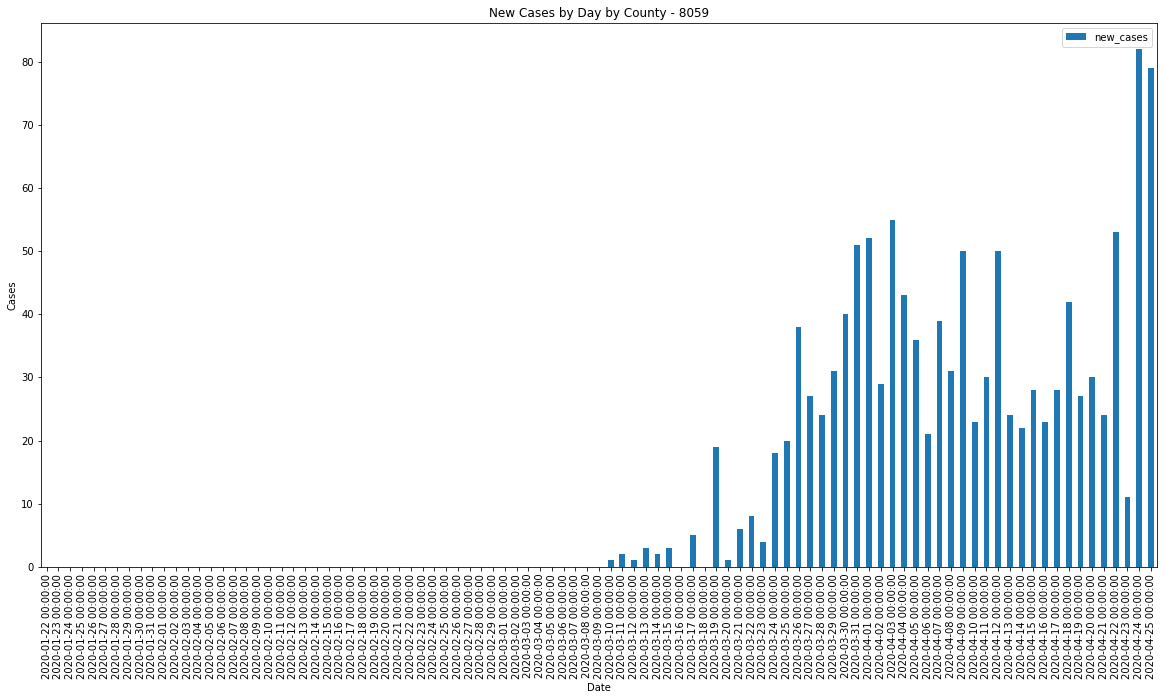

In [24]:
#date_and_state.head()
ax = date_and_county.plot(kind='bar', figsize = (20,10), x='date',y='new_cases', title = "New Cases by Day by County - " + str(fips_code))
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

## Look at Population Data

In [25]:
#Import population data
#pop_df = pd.read_csv("State_Populations.csv")

In [26]:
#pop_df.head()

In [27]:
#Isolate the data for the most recent date
latest_date = df[df['date'] == max_date]

In [28]:
latest_date.head()

,countyFIPS,o_County Name,o_State,stateFIPS,date,o_cases,deaths,population
300330,0,Statewide Unallocated,AL,1,2020-04-25,0,0,0
300331,1001,Autauga County,AL,1,2020-04-25,37,2,55869
300332,1003,Baldwin County,AL,1,2020-04-25,154,3,223234
300333,1005,Barbour County,AL,1,2020-04-25,33,0,24686
300334,1007,Bibb County,AL,1,2020-04-25,35,0,22394


Text(0, 0.5, 'Cases')

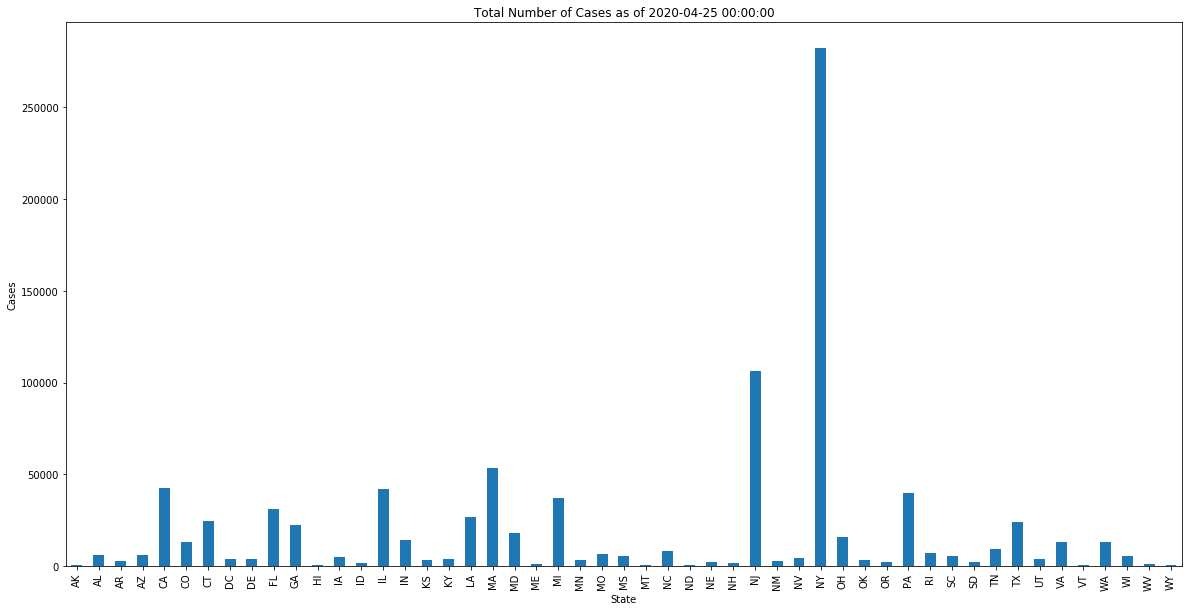

In [29]:
#Get total number of cases by state on most recent date
latest_date_sum = latest_date.groupby("o_State")["o_cases"].sum()
latest_date_sum.head()

ax = latest_date_sum.plot(kind='bar',figsize = (20,10), x='o_State',y='new_cases', title = "Total Number of Cases as of " + str(max_date))
ax.set_xlabel("State")
ax.set_ylabel("Cases")

## Cases per Population by State

In [30]:
combined_df = latest_date.groupby("o_State")["o_cases", "population"].sum()
combined_df.head()


,o_cases,population
o_State,,
AK,340,731545
AL,6213,4903185
AR,2909,3017804
AZ,6280,7278717
CA,42566,39512223


In [31]:
#Create column that is cases as a percent of population
combined_df['percent_of_pop'] = (combined_df['o_cases'] / combined_df['population']) * 100
combined_df.head()

#Sort data
combined_df.sort_values(by=['percent_of_pop'], ascending = False)
sorted_df = combined_df.sort_values(by=['percent_of_pop'], ascending = False)
sorted_df

,o_cases,population,percent_of_pop
o_State,,,
NY,282212,19453561,1.450696
NJ,106074,8882190,1.194233
MA,53348,6892503,0.774000
CT,24582,3565287,0.689482
RI,6875,1059361,0.648976
LA,26511,4648794,0.570277
DC,3699,705749,0.524124
MI,37200,9986857,0.372490
DE,3576,973764,0.367235


In [32]:
sorted_df = sorted_df.reset_index()
sorted_df.head()

,o_State,o_cases,population,percent_of_pop
0,NY,282212,19453561,1.450696
1,NJ,106074,8882190,1.194233
2,MA,53348,6892503,0.774000
3,CT,24582,3565287,0.689482
4,RI,6875,1059361,0.648976


Text(0, 0.5, 'Percent of Population')

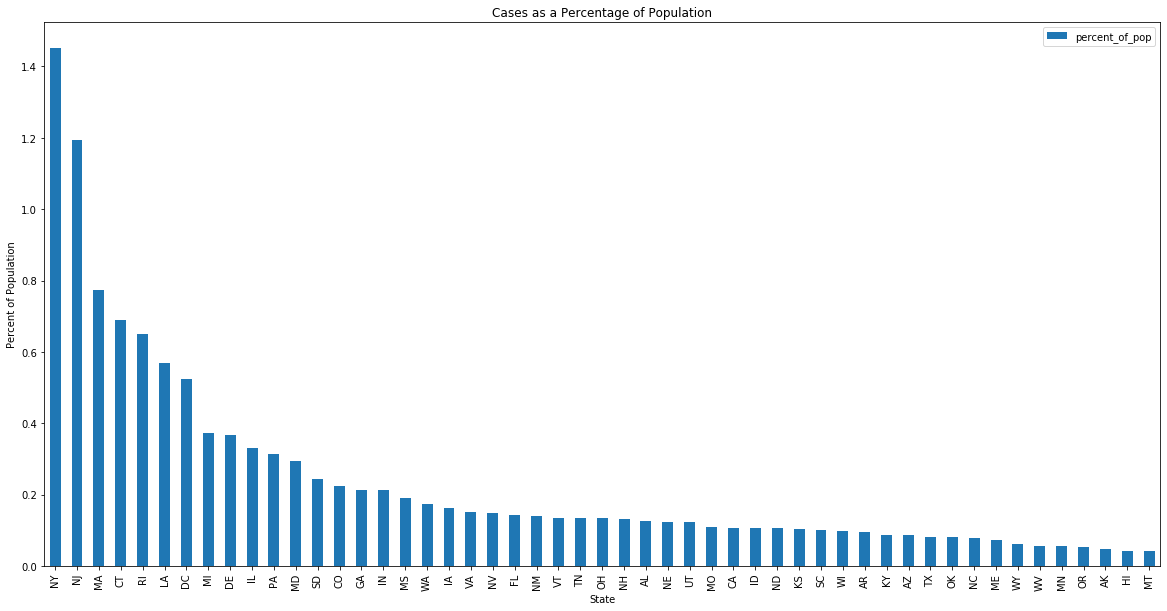

In [33]:
ax = sorted_df.plot(kind='bar',figsize = (20,10), x='o_State',y='percent_of_pop',title = "Cases as a Percentage of Population")
ax.set_xlabel("State")
ax.set_ylabel("Percent of Population")

## Deaths per Population by State

In [40]:
deaths_per_capita = latest_date.groupby("o_State")["deaths", "population"].sum()
deaths_per_capita.head()

,deaths,population
o_State,,
AK,9,731545
AL,213,4903185
AR,48,3017804
AZ,273,7278717
CA,1693,39512223


In [50]:
#Create column that is deaths as a percent of population
deaths_per_capita['death_percent_of_pop'] = (deaths_per_capita['deaths'] / deaths_per_capita['population']) * 100
#deaths_per_capita.head()

#Sort data
deaths_per_capita.sort_values(by=['death_percent_of_pop'], ascending = False)
sorted_df_2 = deaths_per_capita.sort_values(by=['death_percent_of_pop'], ascending = False)
sorted_df_2

,deaths,population,death_percent_of_pop
o_State,,,
NY,16599,19453561,0.085326
NJ,5866,8882190,0.066042
CT,1862,3565287,0.052226
MA,2730,6892503,0.039608
LA,1644,4648794,0.035364
MI,3276,9986857,0.032803
DC,165,705749,0.023379
RI,215,1059361,0.020295
IL,1875,12671821,0.014797


Text(0, 0.5, 'Percent of Population')

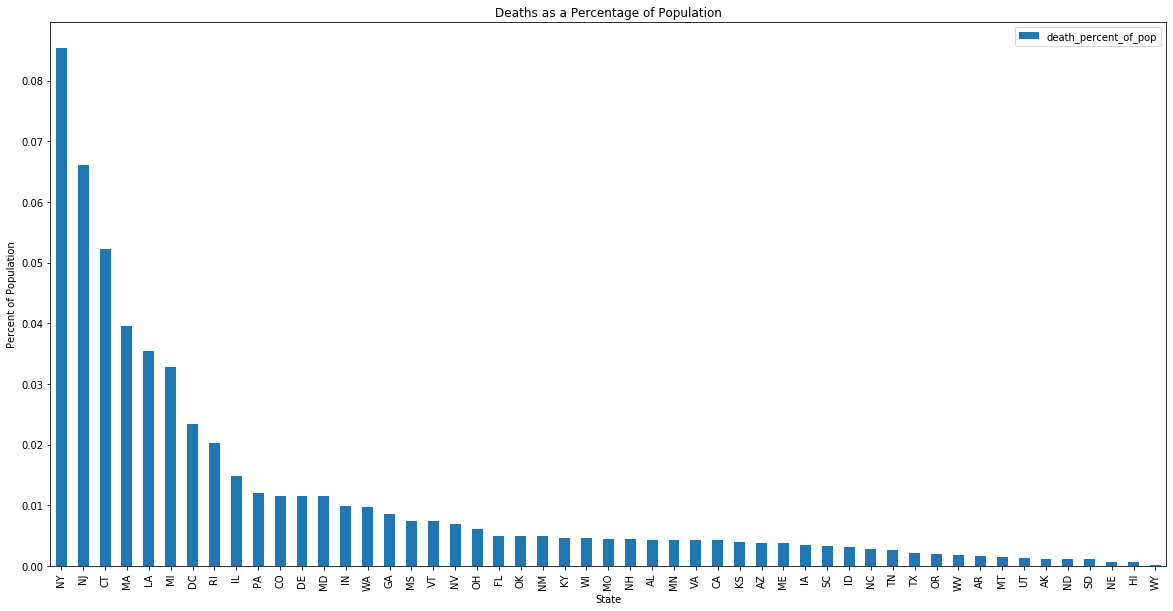

In [52]:
ax = sorted_df_2.plot(kind='bar',figsize = (20,10), y='death_percent_of_pop', use_index=True, title = "Deaths as a Percentage of Population")
ax.set_xlabel("State")
ax.set_ylabel("Percent of Population")

## Death Rate

In [34]:
latest_date.head()

,countyFIPS,o_County Name,o_State,stateFIPS,date,o_cases,deaths,population
300330,0,Statewide Unallocated,AL,1,2020-04-25,0,0,0
300331,1001,Autauga County,AL,1,2020-04-25,37,2,55869
300332,1003,Baldwin County,AL,1,2020-04-25,154,3,223234
300333,1005,Barbour County,AL,1,2020-04-25,33,0,24686
300334,1007,Bibb County,AL,1,2020-04-25,35,0,22394


In [35]:
latest_date_cd = latest_date.groupby("o_State")["o_cases","deaths"].sum()
latest_date_cd.head()

,o_cases,deaths
o_State,,
AK,340,9
AL,6213,213
AR,2909,48
AZ,6280,273
CA,42566,1693


In [36]:
#Add column for death rate
latest_date_cd['death_rate'] = (latest_date_cd['deaths'] / latest_date_cd['o_cases']) * 100
latest_date_cd.head()

,o_cases,deaths,death_rate
o_State,,,
AK,340,9,2.647059
AL,6213,213,3.428296
AR,2909,48,1.650052
AZ,6280,273,4.347134
CA,42566,1693,3.977353


In [37]:
sorted_latest_date_cd = latest_date_cd.sort_values(by=['death_rate'], ascending = False)
sorted_latest_date_cd.head()

,o_cases,deaths,death_rate
o_State,,,
MI,37200,3276,8.806452
MN,3128,244,7.800512
CT,24582,1862,7.574648
LA,26511,1644,6.201200
OK,3192,194,6.077694


Text(0, 0.5, 'Death Rate')

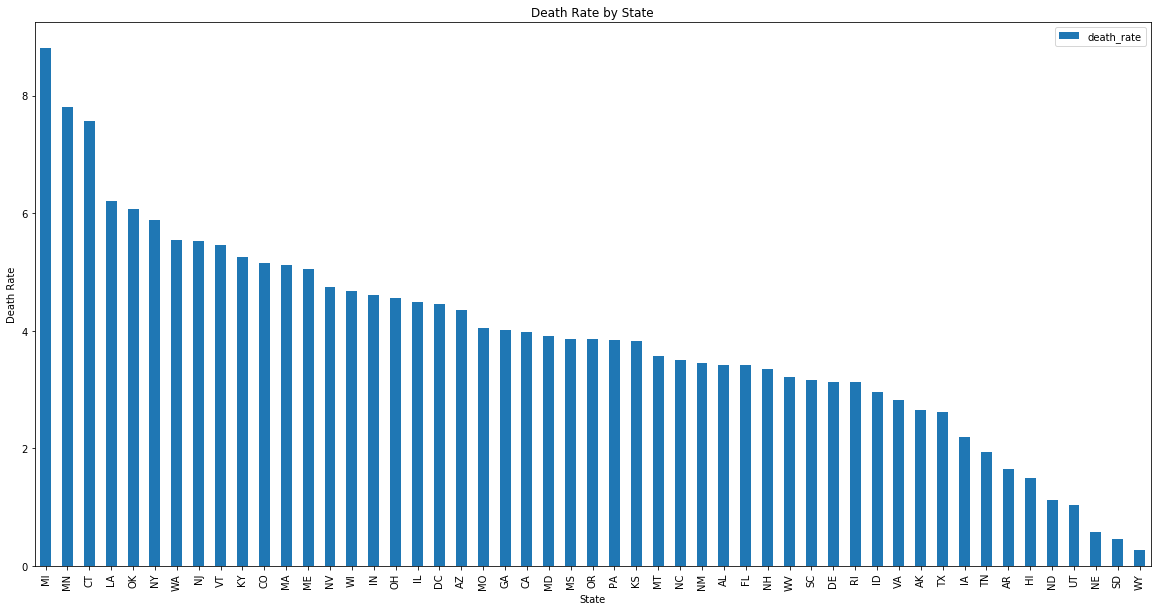

In [38]:
ax = sorted_latest_date_cd.plot(kind='bar',figsize = (20,10), y='death_rate', use_index=True, title = "Death Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Death Rate")